<a href="https://colab.research.google.com/github/gabrielsabinocastro/testes/blob/main/proj_quant_testando_bibliotecas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Bibliotecas**

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


     |████████████████████████████████| 5.5MB 6.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=5d4648a8f0c6f99b578d90714245f4bb313d79f636071065e0845b97ae8cff0f
  Stored in directory: /tmp/pip-ephem-wheel-cache-6vgamob7/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

# **2 - Obtendo e tratando os dados**

In [ ]:
tickers = ["ABEV3.SA", "ITSA4.SA", "USIM5.SA", "VALE3.SA", "WEGE3.SA", '^BVSP']

dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]


In [ ]:
dados_yahoo

In [ ]:
retorno = dados_yahoo.pct_change()
retorno

In [ ]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

In [ ]:
carteira = 10000*retorno_acumulado.iloc[:,:5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2016-02-12,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2016-02-15,10000.000000,10015.037540,10588.234741,10253.659301,9770.031781,50626.963363,0.012539
2016-02-16,10027.901993,10165.415322,11529.411484,11014.635027,9756.097079,52493.460905,0.036868
2016-02-17,10189.729735,10210.529132,11764.706393,11619.513224,9749.132081,53533.610565,0.019815
2016-02-18,10267.855807,10030.077459,10235.294186,11229.268314,9860.623810,51623.119576,-0.035688
...,...,...,...,...,...,...,...
2021-02-08,9642.942638,26433.788923,168352.772252,107214.006817,84371.666075,396015.176705,-0.000102
2021-02-09,9655.851826,26658.224747,170536.025143,107487.713147,83888.134659,398225.949521,0.005583
2021-02-10,9688.124181,26483.662758,167503.734602,108000.913602,84894.670520,396571.105662,-0.004156


# **3 - Resultados**

Start date,2016-02-12
End date,2021-02-12
Total months,59
,Backtest
Annual return,52.748%
Cumulative returns,712.176%
Annual volatility,38.499%
Sharpe ratio,1.30
Calmar ratio,1.09
Stability,0.76
Max drawdown,-48.348%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,48.35,2020-01-23,2020-03-23,2020-08-18,149
1,30.23,2018-02-26,2018-06-25,2020-01-02,484
2,21.92,2017-02-20,2017-04-13,2017-08-07,121
3,21.46,2016-04-27,2016-06-14,2016-07-21,62
4,14.63,2021-01-11,2021-02-02,NaT,NaN


Stress Events,mean,min,max
New Normal,0.20%,-13.79%,14.14%


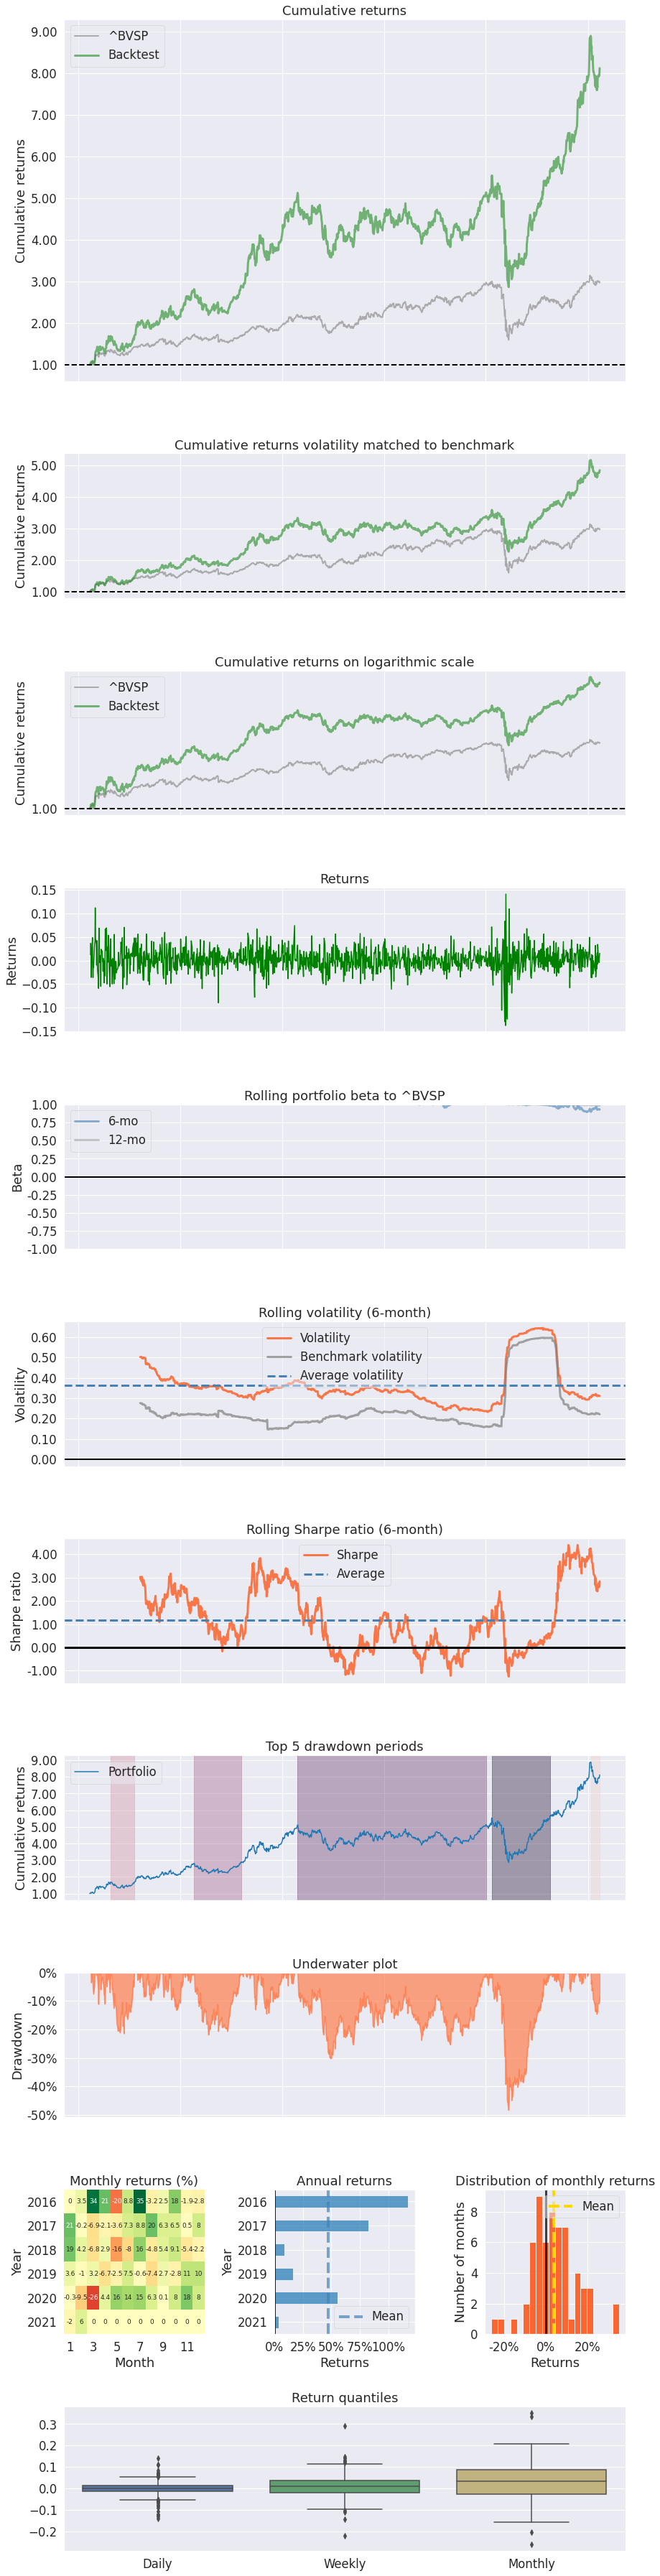

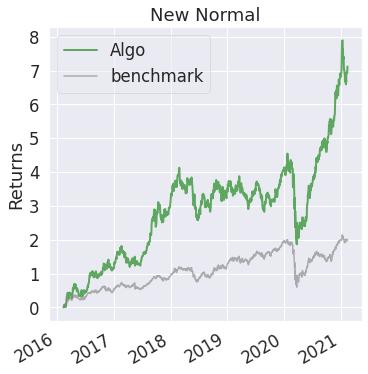

In [ ]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


(0.8, 1.8)

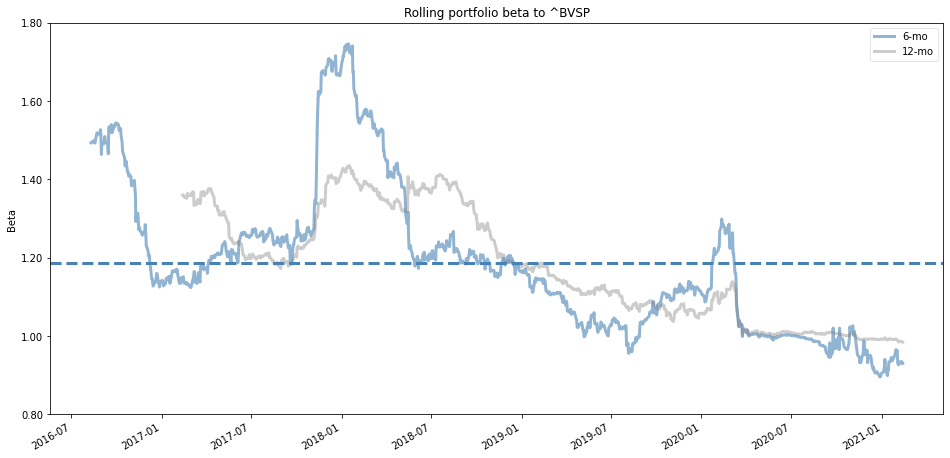

In [ ]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.8))